In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [3]:
import pandas as pd
df = pd.read_csv("../data/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
# A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

In [5]:
# top 20 de fallecidos
top20 = df.groupby("location")["total_deaths"].sum().sort_values(ascending=False)[:20]
top20

location
World             709830655.0
Europe            209623432.0
North America     193716858.0
South America     164455044.0
European Union    142338593.0
United States     133764343.0
Asia              116742581.0
Brazil             80717948.0
India              50434903.0
Mexico             46891587.0
Peru               38526518.0
United Kingdom     31106660.0
Italy              28153262.0
Africa             24979353.0
France             24594693.0
Russia             20439019.0
Spain              20429587.0
Iran               17124901.0
Colombia           15552891.0
Germany            14883290.0
Name: total_deaths, dtype: float64

In [6]:
# La letra de mi DNI es la 'H'. No hay ningun pais que empiece por esa letra que este en el top20, por lo que el analisis se hará con 'Spain'
top20.index.str.startswith("H")

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [7]:
# En este caso, utilizaremos las columnas:

    #Nuevos casos
    #Nuevos fallecidos
    #Población
    #Fallecidos totales
    #Casos totales

# La fecha debe estar en el índice.


In [8]:
df1 = df[["new_cases", "new_deaths", "population", "total_deaths", "total_cases"]]
df1.head()

,new_cases,new_deaths,population,total_deaths,total_cases
0,1.0,NaN,38928341.0,NaN,1.0
1,0.0,NaN,38928341.0,NaN,1.0
2,0.0,NaN,38928341.0,NaN,1.0
3,0.0,NaN,38928341.0,NaN,1.0
4,0.0,NaN,38928341.0,NaN,1.0


In [9]:
df1.set_index(df["date"])

,new_cases,new_deaths,population,total_deaths,total_cases
date,,,,,
2020-02-24,1.0,NaN,38928341.0,NaN,1.0
2020-02-25,0.0,NaN,38928341.0,NaN,1.0
2020-02-26,0.0,NaN,38928341.0,NaN,1.0
2020-02-27,0.0,NaN,38928341.0,NaN,1.0
2020-02-28,0.0,NaN,38928341.0,NaN,1.0
...,...,...,...,...,...
2021-06-11,192.0,3.0,14862927.0,1629.0,39688.0
2021-06-12,164.0,3.0,14862927.0,1632.0,39852.0
2021-06-13,107.0,0.0,14862927.0,1632.0,39959.0


In [10]:
# 1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

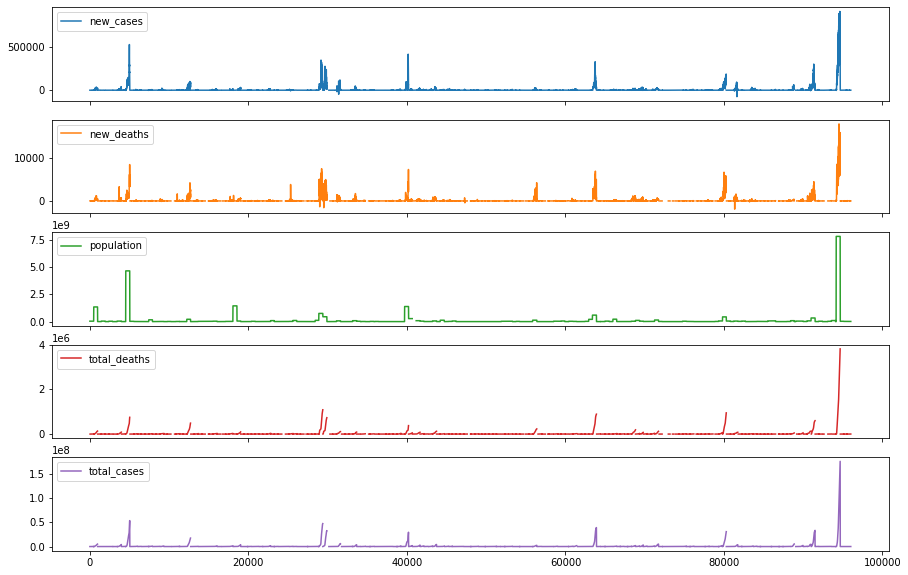

In [13]:
df1.plot(subplots=True, figsize=(15,10))
plt.show()